In [10]:
# Neu laden des Moduls falls es Änderungen gab
import importlib
import src.data.data_check
importlib.reload(src.data.data_check)

from src.data.data_check import check_duplicates, check_corrupted_files

# Pfad zum raw-Verzeichnis
dataset_path = "../data/raw"

# Überprüfung auf Duplikate
duplicates = check_duplicates(dataset_path)
if duplicates:
    print("Duplikate gefunden:")
    for file in duplicates:
        print(file)
else:
    print("Keine Duplikate gefunden.")

# Überprüfung auf beschädigte oder leere Dateien mit paralleler Verarbeitung
corrupted_files = check_corrupted_files(dataset_path, max_workers=8)
if corrupted_files:
    print("\nBeschädigte oder leere Dateien gefunden:")
    for file in corrupted_files:
        print(file)
else:
    print("Keine beschädigten oder leeren Dateien gefunden.")


Keine Duplikate gefunden.
Keine beschädigten oder leeren Dateien gefunden.


In [31]:
importlib.reload(src.data.dataset_creator)
from src.data.dataset_creator import create_dataset

# Pfad zum raw-Verzeichnis
dataset_path = "../data/raw"

# Erstellen und Speichern des Datasets
df = create_dataset(dataset_path, save_path="../data/processed",csv_filename="dataset.csv")

# Ausgabe der ersten Zeilen zur Überprüfung
print(df.head())


Verarbeite Datei: ../data/raw/100_1_0_20170110183726390.jpg
Verarbeite Datei: ../data/raw/100_1_2_20170105174847679.jpg
Verarbeite Datei: ../data/raw/100_1_2_20170110182836729.jpg
Verarbeite Datei: ../data/raw/101_1_2_20170105174739309.jpg
Verarbeite Datei: ../data/raw/10_0_0_20161220222308131.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170103200329407.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170103200522151.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170103233459275.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170104013211746.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110215927291.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110220033115.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110220111082.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110220235233.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110220251986.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110220255346.jpg
Verarbeite Datei: ../data/raw/10_0_0_20170110220316298.jpg
Verarbeite Datei: ../data/raw/10_0_0_201701102204038

In [2]:
import pandas as pd
from src.data.data_splitter import stratified_split_and_copy_images_by_race

# Laden des vollständigen Datasets
dataset_path = "../data/processed/dataset.csv"
df = pd.read_csv(dataset_path)
print(df.head())

# Aufteilen und Kopieren der Bilder mit einer gleichmäßigen Verteilung nach Rasse
stratified_split_and_copy_images_by_race(df, subset_size=0.1, test_size=0.2)


                                   file_path  age  gender  race
0  ../data/raw/100_1_0_20170110183726390.jpg  100       1     0
1  ../data/raw/100_1_2_20170105174847679.jpg  100       1     2
2  ../data/raw/100_1_2_20170110182836729.jpg  100       1     2
3  ../data/raw/101_1_2_20170105174739309.jpg  101       1     2
4   ../data/raw/10_0_0_20161220222308131.jpg   10       0     0
Verkleinerte, gleichmäßig nach Rasse verteilte Trainingsdaten: 811 Bilder in ../data/processed/train kopiert.
Verkleinerte, gleichmäßig nach Rasse verteilte Testdaten: 203 Bilder in ../data/processed/test kopiert.


Found 811 images belonging to 5 classes.
Found 203 images belonging to 5 classes.


C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.3914 - loss: 1.4631 - val_accuracy: 0.4896 - val_loss: 1.3751
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 1.4056 - val_accuracy: 0.6364 - val_loss: 1.2098
Epoch 3/20


C:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.4868 - loss: 1.3909 - val_accuracy: 0.5104 - val_loss: 1.3085
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 1.4990 - val_accuracy: 0.2727 - val_loss: 1.8681
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.4848 - loss: 1.4022 - val_accuracy: 0.4948 - val_loss: 1.3456
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 1.3231 - val_accuracy: 0.5455 - val_loss: 1.2602
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.4774 - loss: 1.3945 - val_accuracy: 0.5000 - val_loss: 1.3247
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.2420 - val_accuracy: 0.4545 - val_loss: 1.3518
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.4747 - loss: 1.3861 - val_accuracy: 0.5000 - val_loss: 1.3110
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5156 - loss: 1.2635 - val_accuracy: 0.4545 - val_loss: 1

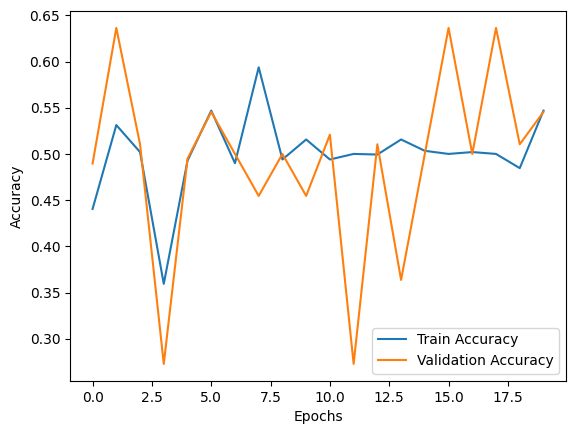

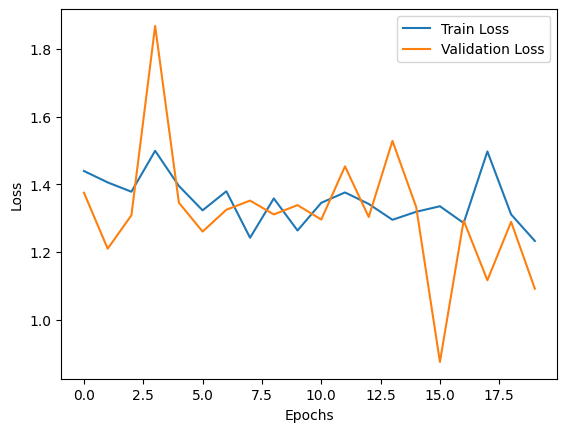

In [9]:
# Importiere die Funktionen aus den src-Modulen
from src.data.data_generator import create_generators
from src.models.cnn_model import build_cnn_model
from src.models.train import compile_and_train, evaluate_model, plot_training_history

# Verzeichnisse für Trainings- und Testbilder
train_dir = '../data/processed/train'
test_dir = '../data/processed/test'

# Daten vorbereiten mit batch_size=32
train_generator, test_generator = create_generators(train_dir, test_dir, batch_size=64)

# CNN-Modell erstellen
model = build_cnn_model(input_shape=(64, 64, 3), num_classes=train_generator.num_classes)

# Modell trainieren
history = compile_and_train(model, train_generator, test_generator, epochs=20)

# Modell evaluieren
evaluate_model(model, test_generator)

# Trainingsergebnisse plotten
plot_training_history(history)
